# Better NLP

This is a wrapper program/library that encapsulates a couple of NLP libraries that are popular among the AI and ML communities.

Examples have been used to illustrate the usage as much as possible. Not all the APIs of the underlying libraries have been covered.

The idea is to keep the API language as high-level as possible, so its easier to use and stays human-readable.

Libraries / frameworks covered:

- nltk [site](http://www.nltk.org/) | [docs](https://buildmedia.readthedocs.org/media/pdf/nltk/latest/nltk.pdf)
- numpy [site](https://www.numpy.org/) | [docs](https://docs.scipy.org/doc/)
- networkx [site](https://networkx.github.io/) | [docs](https://networkx.github.io/documentation/stable/index.html)

See [https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/examples/better-nlp](https://github.com/neomatrix369/awesome-ai-ml-dl/blob/master/examples/better-nlp) for more details.

### This notebook will demonstrate the below NLP features / functionalities, using the above mentioned libraries

- Cosine similarity summarisation technqiue (using TextRank)
- Summarisation 2 (TODO)
- Summarisation 3 (TODO)
- Summarisation 4 (TODO)
- Summarisation 5 (TODO)

_Summarization can be defined as a task of producing a concise and fluent summary while preserving key information and overall meaning._

### Resources

- [Understand Text Summarization and create your own summarizer in python](https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70)
- [Beyond bag of words: Using PyTextRank to find Phrases and Summarize text](https://medium.com/@aneesha/beyond-bag-of-words-using-pytextrank-to-find-phrases-and-summarize-text-f736fa3773c5)
- [Build a simple text summarisation tool using NLTK](https://medium.com/@wilamelima/build-a-simple-text-summarisation-tool-using-nltk-ff0984fedb4f)
- [Summarise Text with TFIDF in Python](https://medium.com/@shivangisareen/summarise-text-with-tfidf-in-python-bc7ca10d3284)
- [How to Make a Text Summarizer - Intro to Deep Learning #10 by Siraj Raval](https://www.youtube.com/watch?v=ogrJaOIuBx4)

#### Setup and installation ( optional )

In case, this notebook is running in a local environment (Linux/MacOS) or _Google Colab_ environment and in case it does not have the necessary dependencies installed then please execute the steps in the next section.

Otherwise, please SKIP to the **Install Spacy model ( NOT optional )** section.

In [0]:
%%time
%%bash

apt-get install apt-utils dselect dpkg

echo "OSTYPE=$OSTYPE"
if [[ "$OSTYPE" == "cygwin" ]] || [[ "$OSTYPE" == "msys" ]] ; then
    echo "Windows or Windows-like environment detected, script not tested, and may not work."
    echo "Try installing the components mention in the install-[ostype].sh scripts manually."
    echo "Or try running under CGYWIN or git-bash."
    echo "If successfully installed, please contribute back with the solution via a pull request, to https://github.com/neomatrix369/awesome-ai-ml-dl/"
    echo "Please give the file a good name, i.e. install-windows.sh or install-windows.bat depending on what kind of script you end up writing"
    exit 0
elif [[ "$OSTYPE" == "linux-gnu" ]] || [[ "$OSTYPE" == "linux" ]]; then
    TARGET_OS="linux"
else
    TARGET_OS="macos"
fi

if [[ -e ../../library/org/neomatrix369 ]]; then
  echo "Library source found"
  
  cd ../../build
  
  echo "Detected OS: ${TARGET_OS}"
  ./install-${TARGET_OS}.sh || true
else
  if [[ -e awesome-ai-ml-dl/examples/better-nlp/library ]]; then
     echo "Library source found"
  else
     git clone "https://github.com/neomatrix369/awesome-ai-ml-dl"
  fi

  echo "Library source exists"
  cd awesome-ai-ml-dl/examples/better-nlp/build

  echo "Detected OS: ${TARGET_OS}"
  ./install-${TARGET_OS}.sh || true 
fi

#### Install Spacy model ( NOT optional )

Install the large English language model for spaCy - will be needed for the examples in this notebooks.

**Note:** from observation it appears that spaCy model should be installed towards the end of the installation process, it avoid errors when running programs using the model.

In [0]:
%%time
%%bash

python -m spacy download en_core_web_lg
python -m spacy link en_core_web_lg en || true

In [0]:
!python -m pip install matplotlib 

## Examples

### Summarisation using the cosine similarity technqiue (extractive summarization)

**Abstractive Summarization:** Abstractive methods select words based on semantic understanding, even those words did not appear in the source documents. It aims at producing important material in a new way. They interpret and examine the text using advanced natural language techniques in order to generate a new shorter text that conveys the most critical information from the original text.

**Flow:** Input document → understand context → semantics → create own summary

**Extractive Summarization:** Extractive methods attempt to summarize articles by selecting a subset of words that retain the most important points.

**Flow:** Input document → sentences similarity → weight sentences → select sentences with higher rank

**Cosine similarity** is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Its measures cosine of the angle between vectors. Angle will be 0 if sentences are similar and tend towards 90 as they begin to differ.

Inspired by the author of https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70

In [0]:
import sys
sys.path.insert(0, '../../library')
sys.path.insert(0, './awesome-ai-ml-dl/examples/better-nlp/library')

from org.neomatrix369.better_nlp import BetterNLP

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
betterNLP = BetterNLP() ### do not re-run this unless you wish to re-initialise the object

In [0]:
generic_text="""Compatibility of systems of linear constraints over the set of natural numbers. 
Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."""

summarised_result = betterNLP.summarise(generic_text)

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("summarisation_processing_time_in_secs=",summarised_result['summarisation_processing_time_in_secs'])
print("summarised_text=",summarised_result['summarised_text'])
print("ranked_sentences=",summarised_result['ranked_sentences'])

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
summarisation_processing_time_in_secs= 0.011878728866577148
summarised_text= Compatibility of systems of linear constraints over the set of natural numbers. 
Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given
ranked_sentences= [(0.4864858243244209, ['Compatibility', 'of', 'systems', 'of', 'linear', 'constraints', 'over', 'the', 'set', 'of', 'natural', 'numbers']), (0.2848330310714116, ['\nCriteria', 'of', 'compatibility', 'of', 'a', 'system', 'of', 'linear', 'Diophantine', 'equations,', 'strict', 'inequations,', 'and', 'nonstrict', 'inequations', 'are', 'considered']), (0.22868114460416727, ['Upper', 'bounds', 'for', 'components', 'of', 'a'

### Summarisation using the vertex ranking algorithm

In [0]:
%%time
%%bash

sed -i 's/graph.edge\[/graph.adj\[/g' /usr/local/lib/python3.7/site-packages/pytextrank/pytextrank.py|| true
sed -i 's/, parse=True//g' /usr/local/lib/python3.7/site-packages/pytextrank/pytextrank.py || true

CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 83.6 ms


In [0]:
betterNLP = BetterNLP() ### do not re-run this unless you wish to re-initialise the object

In [0]:
# https://medium.com/@aneesha/beyond-bag-of-words-using-pytextrank-to-find-phrases-and-summarize-text-f736fa3773c5 
# https://github.com/DerwenAI/pytextrank/blob/master/example.ipynb

source_file='source.json'
source_json_content='{"id":"777", "text":"Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."}'
with open(source_file, 'w') as f:
    f.write("%s" % source_json_content)

summarised_result = betterNLP.summarise(source_file, method="pytextrank")

print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("summarisation_processing_time_in_secs=",summarised_result['summarisation_processing_time_in_secs'])
print("summarised_text=",summarised_result['summarised_text'])
print("key_phrases=",summarised_result['key_phrases'])
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
summarisation_processing_time_in_secs= 16.3627872467041
summarised_text= Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types.
key_phrases= minimal set, natural numbers, set, types, systems, linear constraints, mixed types, solutions, minimal generating sets, strict inequations, types systems
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

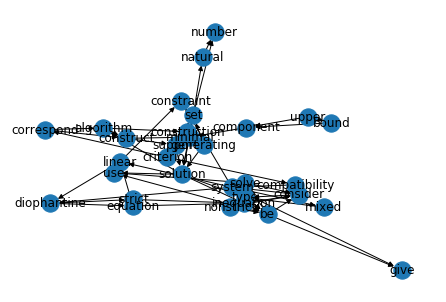

In [0]:
betterNLP.show_graph(summarised_result["graph"])

### Summarisation 3

### Summarisation 4

In [0]:
### Summarisation 5